# Supervised Model Project


## Project Workflow



1. Problem Definition

        Objective: Develop a predictive model that accurately forecast a stundent's overall score based on several futures.

        Scope:
        1. Create the target variable(score) by calculating the average of the math, reading, and wirting scores.

        2. Apply One Hot Encoding for categorical features like gender, lunch and race/etnicity.
        
        3. Use Ordinal Encoding for ordered features, such such parental level of education and test preparation courses.


## 2. Data Collection
Collect data from the company’s database containing customer demographics, usage patterns, and service details.

In [2]:
# Importing libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/study_performance.csv'
csv = pd.read_csv(file_path,encoding='ISO-8859-1')
csv.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
students_df= csv.copy()
students_df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 3. Data Exploration / Cleaning / Engeniering
     Perform EDA to identify patterns in the data.
     Clean the data by handling missing values and outliers.

In [4]:
students_df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## Variable to predict score

In [5]:
score_columns = [columna for columna in students_df.columns if columna.endswith('_score')]
score_columns

['math_score', 'reading_score', 'writing_score']

In [6]:
students_df['score']= round(students_df[score_columns].sum(axis=1)/30)
students_df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,score
0,female,group B,bachelor's degree,standard,none,72,72,74,7.0
1,female,group C,some college,standard,completed,69,90,88,8.0
2,female,group B,master's degree,standard,none,90,95,93,9.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,5.0
4,male,group C,some college,standard,none,76,78,75,8.0
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,9.0
996,male,group C,high school,free/reduced,none,62,55,55,6.0
997,female,group C,high school,free/reduced,completed,59,71,65,6.0
998,female,group D,some college,standard,completed,68,78,77,7.0


In [7]:
students_df.drop(columns=score_columns,inplace=True)
students_df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,score
0,female,group B,bachelor's degree,standard,none,7.0
1,female,group C,some college,standard,completed,8.0
2,female,group B,master's degree,standard,none,9.0
3,male,group A,associate's degree,free/reduced,none,5.0
4,male,group C,some college,standard,none,8.0
...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,9.0
996,male,group C,high school,free/reduced,none,6.0
997,female,group C,high school,free/reduced,completed,6.0
998,female,group D,some college,standard,completed,7.0


## Transforming variable categorical to Numerical

### One Hot Encoding

In [8]:
# Converting categorical columns into numerical using hotencoder
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

In [9]:
encoded_data = encoder.fit_transform(students_df[['gender']])
encoded_data
# Femanle = 1 , Male = 0

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [10]:
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['gender']))
encoded_df

,gender_female,gender_male
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0
...,...,...
995,1.0,0.0
996,0.0,1.0
997,1.0,0.0
998,1.0,0.0


In [11]:
students_df= pd.concat([students_df,encoded_df],axis=1)
students_df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,score,gender_female,gender_male
0,female,group B,bachelor's degree,standard,none,7.0,1.0,0.0
1,female,group C,some college,standard,completed,8.0,1.0,0.0
2,female,group B,master's degree,standard,none,9.0,1.0,0.0
3,male,group A,associate's degree,free/reduced,none,5.0,0.0,1.0
4,male,group C,some college,standard,none,8.0,0.0,1.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,9.0,1.0,0.0
996,male,group C,high school,free/reduced,none,6.0,0.0,1.0
997,female,group C,high school,free/reduced,completed,6.0,1.0,0.0
998,female,group D,some college,standard,completed,7.0,1.0,0.0


In [12]:
students_df.drop(columns=['gender'],inplace=True)
students_df

,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,score,gender_female,gender_male
0,group B,bachelor's degree,standard,none,7.0,1.0,0.0
1,group C,some college,standard,completed,8.0,1.0,0.0
2,group B,master's degree,standard,none,9.0,1.0,0.0
3,group A,associate's degree,free/reduced,none,5.0,0.0,1.0
4,group C,some college,standard,none,8.0,0.0,1.0
...,...,...,...,...,...,...,...
995,group E,master's degree,standard,completed,9.0,1.0,0.0
996,group C,high school,free/reduced,none,6.0,0.0,1.0
997,group C,high school,free/reduced,completed,6.0,1.0,0.0
998,group D,some college,standard,completed,7.0,1.0,0.0


In [13]:
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(students_df[['test_preparation_course']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['test_preparation_course']))
students_df= pd.concat([students_df,encoded_df],axis=1)
students_df.drop(columns=['test_preparation_course'],inplace=True)
students_df

,race_ethnicity,parental_level_of_education,lunch,score,gender_female,gender_male,test_preparation_course_completed,test_preparation_course_none
0,group B,bachelor's degree,standard,7.0,1.0,0.0,0.0,1.0
1,group C,some college,standard,8.0,1.0,0.0,1.0,0.0
2,group B,master's degree,standard,9.0,1.0,0.0,0.0,1.0
3,group A,associate's degree,free/reduced,5.0,0.0,1.0,0.0,1.0
4,group C,some college,standard,8.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
995,group E,master's degree,standard,9.0,1.0,0.0,1.0,0.0
996,group C,high school,free/reduced,6.0,0.0,1.0,0.0,1.0
997,group C,high school,free/reduced,6.0,1.0,0.0,1.0,0.0
998,group D,some college,standard,7.0,1.0,0.0,1.0,0.0


In [14]:
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(students_df[['race_ethnicity']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['race_ethnicity']))
students_df= pd.concat([students_df,encoded_df],axis=1)
students_df.drop(columns=['race_ethnicity'],inplace=True)
students_df

,parental_level_of_education,lunch,score,gender_female,gender_male,test_preparation_course_completed,test_preparation_course_none,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E
0,bachelor's degree,standard,7.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,some college,standard,8.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,master's degree,standard,9.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,associate's degree,free/reduced,5.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,some college,standard,8.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,master's degree,standard,9.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
996,high school,free/reduced,6.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
997,high school,free/reduced,6.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
998,some college,standard,7.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(students_df[['lunch']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['lunch']))
students_df= pd.concat([students_df,encoded_df],axis=1)
students_df.drop(columns=['lunch'],inplace=True)
students_df

,parental_level_of_education,score,gender_female,gender_male,test_preparation_course_completed,test_preparation_course_none,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,lunch_free/reduced,lunch_standard
0,bachelor's degree,7.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,some college,8.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,master's degree,9.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,associate's degree,5.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,some college,8.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,master's degree,9.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
996,high school,6.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
997,high school,6.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
998,some college,7.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### Ordinal Encoding

In [16]:
students_df['parental_level_of_education'].value_counts()

,count
parental_level_of_education,
some college,226
associate's degree,222
high school,196
some high school,179
bachelor's degree,118
master's degree,59


In [17]:
#Setting the order before the encoding
from sklearn.preprocessing import OrdinalEncoder

orignal_categories = ['some high school','high school','some college','associate\'s degree','bachelor\'s degree','master\'s degree']

encoder = OrdinalEncoder(categories=[orignal_categories])

encoded_data= encoder.fit_transform(students_df[['parental_level_of_education']])

encoded_df = pd.DataFrame(encoded_data, columns=['parental_level_of_education_encoded'])

students_df= pd.concat([students_df,encoded_df],axis=1)

students_df.drop(columns=['parental_level_of_education'],inplace=True)

students_df

,score,gender_female,gender_male,test_preparation_course_completed,test_preparation_course_none,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,lunch_free/reduced,lunch_standard,parental_level_of_education_encoded
0,7.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0
1,8.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0
2,9.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0
3,5.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
4,8.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0
996,6.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
997,6.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
998,7.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0


## 4. Feature Engineering
  Select features such as customer tenure, monthly charges, and contract type.
  Create new features like the total amount spent and average monthly charges

## 5. Model Selection and Training
  Choose algorithms like logistic regression, decision trees, and random forests.
  Train the models and tune hyperparameters using cross-validation.

###  RandomForestRegressor &  LinearRegression

In [18]:
#We will use RandomForestRegressor &  LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [19]:
students_df.columns

Index(['score', 'gender_female', 'gender_male',
       'test_preparation_course_completed', 'test_preparation_course_none',
       'race_ethnicity_group A', 'race_ethnicity_group B',
       'race_ethnicity_group C', 'race_ethnicity_group D',
       'race_ethnicity_group E', 'lunch_free/reduced', 'lunch_standard',
       'parental_level_of_education_encoded'],
      dtype='object')

In [20]:
x = students_df.drop(columns=['score'])
y= students_df['score']

x_train,x_test, y_train, y_test = train_test_split(x, y, test_size= 0.20, random_state=21)
x_train

,gender_female,gender_male,test_preparation_course_completed,test_preparation_course_none,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,lunch_free/reduced,lunch_standard,parental_level_of_education_encoded
108,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0
134,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0
585,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0
42,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0
990,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
48,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0
772,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
824,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
207,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


In [21]:
rf_model= RandomForestRegressor(n_estimators = 100, random_state = 42)
rf_model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [22]:
lr_model= LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [23]:
rf_predictions = rf_model.predict(x_test)
lr_predictions = lr_model.predict(x_test)

In [24]:
rf_mse = mean_squared_error(y_test, rf_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)

In [25]:
print("Random Forest MSE:", rf_mse)
print("Linear Regression MSE:", lr_mse)

Random Forest MSE: 2.1102721767233783
Linear Regression MSE: 1.659640121459961


In [26]:
#Comparing the prediton for rf and lr and the actual


print("\nSample Predictions:")
num_samples= 5
for i in range(num_samples):
    print(f"Sample {i+1}:")
    print(f"- Random Forest Prediction: {rf_predictions[i]}, Actual: {y_test.iloc[i]}")
    print(f"- Linear Regression Prediction: {lr_predictions[i]}, Actual: {y_test.iloc[i]}")



Sample Predictions:
Sample 1:
- Random Forest Prediction: 7.105639999706178, Actual: 9.0
- Linear Regression Prediction: 6.8125, Actual: 9.0
Sample 2:
- Random Forest Prediction: 5.721404761904762, Actual: 4.0
- Linear Regression Prediction: 6.0, Actual: 4.0
Sample 3:
- Random Forest Prediction: 4.800849206349207, Actual: 7.0
- Linear Regression Prediction: 5.53125, Actual: 7.0
Sample 4:
- Random Forest Prediction: 5.303643939393937, Actual: 5.0
- Linear Regression Prediction: 6.41796875, Actual: 5.0
Sample 5:
- Random Forest Prediction: 6.437789377289376, Actual: 6.0
- Linear Regression Prediction: 5.73046875, Actual: 6.0


In [27]:
#Lets round

lf_predictions= rf_model.predict(x_test).round()
rf_predictions= lr_model.predict(x_test).round()

rf_mse = mean_squared_error(y_test, rf_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)

print("Random Forest MSE:", rf_mse)
print("Linear Regression MSE:", lr_mse)

print("\nSample Predictions:")
num_samples = 5
for i in range(num_samples):
    print(f"Sample {i+1}:")
    print(f"- Random Forest Prediction: {rf_predictions[i]}, Actual: {y_test.iloc[i]}")
    print(f"- Linear Regression Prediction: {lr_predictions[i]}, Actual: {y_test.iloc[i]}")

Random Forest MSE: 1.8
Linear Regression MSE: 1.659640121459961

Sample Predictions:
Sample 1:
- Random Forest Prediction: 7.0, Actual: 9.0
- Linear Regression Prediction: 6.8125, Actual: 9.0
Sample 2:
- Random Forest Prediction: 6.0, Actual: 4.0
- Linear Regression Prediction: 6.0, Actual: 4.0
Sample 3:
- Random Forest Prediction: 6.0, Actual: 7.0
- Linear Regression Prediction: 5.53125, Actual: 7.0
Sample 4:
- Random Forest Prediction: 6.0, Actual: 5.0
- Linear Regression Prediction: 6.41796875, Actual: 5.0
Sample 5:
- Random Forest Prediction: 6.0, Actual: 6.0
- Linear Regression Prediction: 5.73046875, Actual: 6.0


### Gradient Boosting Regressor (GBR)

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr_model.fit(x_train, y_train)
gbr_predictions = gbr_model.predict(x_test)
gbr_mse = mean_squared_error(y_test, gbr_predictions)

###  Support Vector Regressor (SVR)

In [29]:
from sklearn.svm import SVR

svr_model = SVR()
svr_model.fit(x_train, y_train)
svr_predictions = svr_model.predict(x_test)
svr_mse = mean_squared_error(y_test, svr_predictions)

In [30]:
#visualizing the models



### K-Nearest Neighbors Regressor (KNN)

In [31]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(x_train, y_train)
knn_predictions = knn_model.predict(x_test)
knn_mse = mean_squared_error(y_test, knn_predictions)

## 6. Model Evaluation
  Evaluate models using accuracy, precision, recall, and F1 score.
  Select the best-performing model.

In [32]:
# Mean Squared Error for each model
rf_mse = mean_squared_error(y_test, rf_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)
gbr_mse = mean_squared_error(y_test, gbr_predictions)
svr_mse = mean_squared_error(y_test, svr_predictions)
knn_mse = mean_squared_error(y_test, knn_predictions)

# Print the results
print(f"Random Forest MSE: {rf_mse}")
print(f"Linear Regression MSE: {lr_mse}")
print(f"Gradient Boosting MSE: {gbr_mse}")
print(f"SVR MSE: {svr_mse}")
print(f"KNN MSE: {knn_mse}")

Random Forest MSE: 1.8
Linear Regression MSE: 1.659640121459961
Gradient Boosting MSE: 1.8954293451053033
SVR MSE: 1.8515843370453544
KNN MSE: 2.0338


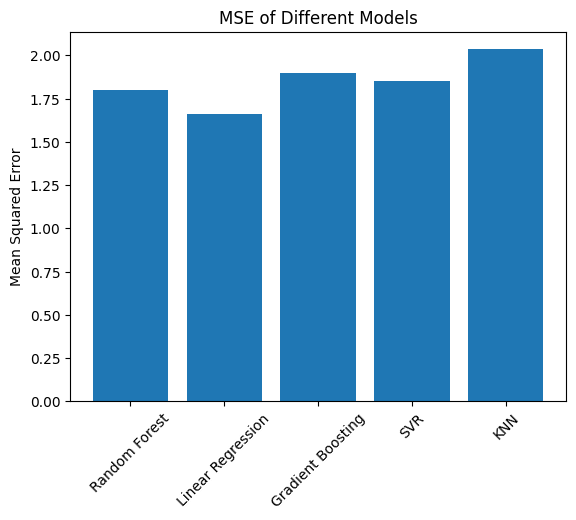

In [33]:
# visualizing models mse
models = ['Random Forest', 'Linear Regression', 'Gradient Boosting', 'SVR', 'KNN']
mse_values = [rf_mse, lr_mse, gbr_mse, svr_mse, knn_mse]

plt.bar(models, mse_values)
plt.ylabel('Mean Squared Error')
plt.title('MSE of Different Models')
plt.xticks(rotation=45)
plt.show()

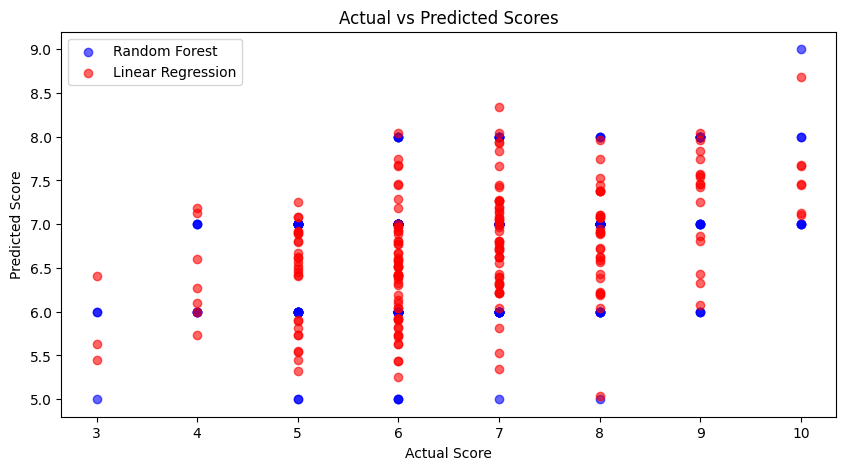

In [34]:
plt.figure(figsize=(10,5))

# Scatter plot for actual vs predicted
plt.scatter(y_test, rf_predictions, color='blue', label='Random Forest', alpha=0.6)
plt.scatter(y_test, lr_predictions, color='red', label='Linear Regression', alpha=0.6)

# Add labels and legend
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Actual vs Predicted Scores')
plt.legend()
plt.show()

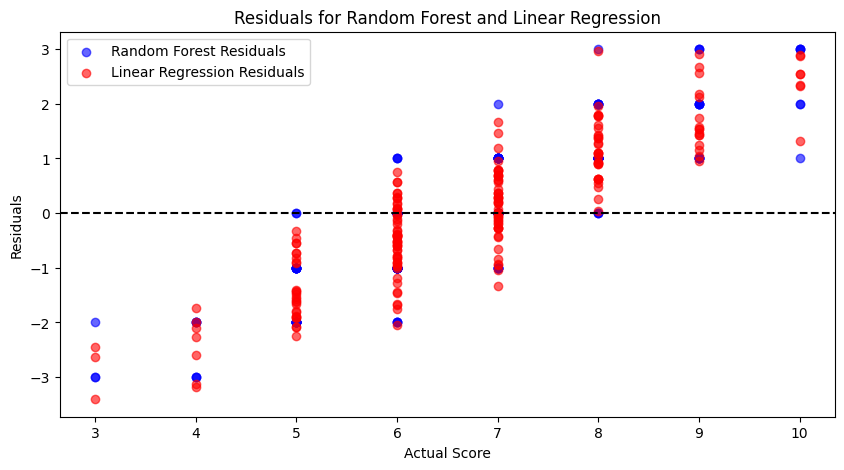

In [35]:
residuals_rf = y_test - rf_predictions
residuals_lr = y_test - lr_predictions

plt.figure(figsize=(10,5))
plt.scatter(y_test, residuals_rf, color='blue', label='Random Forest Residuals', alpha=0.6)
plt.scatter(y_test, residuals_lr, color='red', label='Linear Regression Residuals', alpha=0.6)

# Add labels and legend
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Actual Score')
plt.ylabel('Residuals')
plt.title('Residuals for Random Forest and Linear Regression')
plt.legend()
plt.show()

In [36]:
import pandas as pd

results_df = pd.DataFrame({
    'Actual': y_test,
    'Random Forest Prediction': rf_predictions,
    'Linear Regression Prediction': lr_predictions
})

# Display first 10 results
results_df.head(10)

,Actual,Random Forest Prediction,Linear Regression Prediction
492,9.0,7.0,6.812500
383,4.0,6.0,6.000000
856,7.0,6.0,5.531250
834,5.0,6.0,6.417969
603,6.0,6.0,5.730469
712,10.0,7.0,7.105469
126,7.0,6.0,6.039062
290,7.0,7.0,6.707031
549,7.0,7.0,7.085938
169,7.0,7.0,6.777344


In [37]:
results_df = pd.DataFrame({
    'Actual': y_test,
    'Random Forest Prediction': rf_predictions,
    'Linear Regression Prediction': lr_predictions,
    'Gradient Boosting Prediction': gbr_predictions,
    'SVR Prediction': svr_predictions,
    'KNN Prediction': knn_predictions
})

# Display the first 10 results
results_df.head(10)

,Actual,Random Forest Prediction,Linear Regression Prediction,Gradient Boosting Prediction,SVR Prediction,KNN Prediction
492,9.0,7.0,6.812500,7.021123,6.966203,6.8
383,4.0,6.0,6.000000,5.845990,6.251044,5.6
856,7.0,6.0,5.531250,5.033293,5.264337,4.8
834,5.0,6.0,6.417969,5.791618,6.158946,5.4
603,6.0,6.0,5.730469,5.660019,5.709033,6.4
712,10.0,7.0,7.105469,7.114814,6.906290,6.8
126,7.0,6.0,6.039062,5.804669,6.115330,5.2
290,7.0,7.0,6.707031,6.577221,6.899506,7.2
549,7.0,7.0,7.085938,6.831049,6.942595,7.2
169,7.0,7.0,6.777344,6.561114,6.778134,6.8


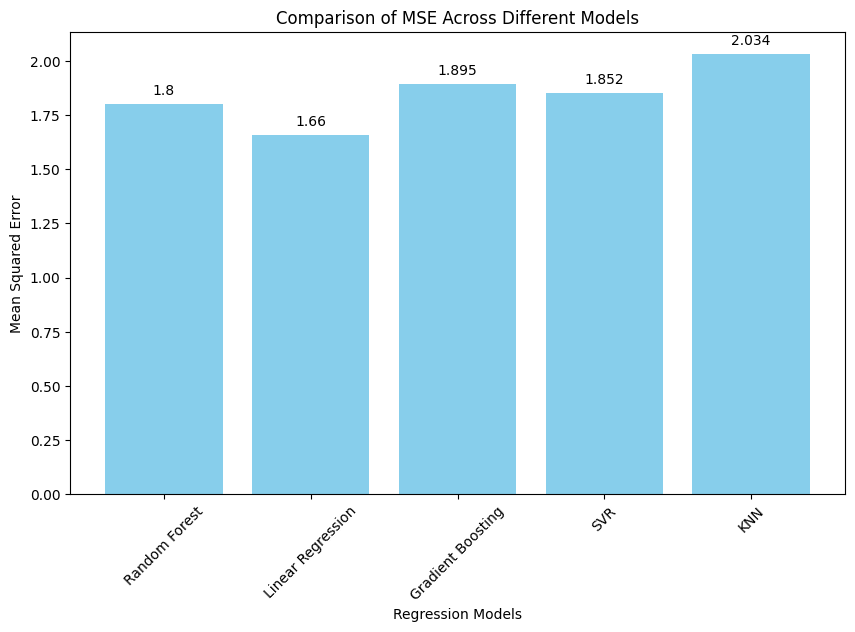

In [38]:
import matplotlib.pyplot as plt

# List of models and their MSE values
models = ['Random Forest', 'Linear Regression', 'Gradient Boosting', 'SVR', 'KNN']
mse_values = [rf_mse, lr_mse, gbr_mse, svr_mse, knn_mse]

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(models, mse_values, color='skyblue')

# Annotate bars with MSE values
for bar, mse in zip(bars, mse_values):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.03, round(mse, 3), ha='center', va='bottom')

plt.xlabel('Regression Models')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of MSE Across Different Models')
plt.xticks(rotation=45)
plt.show()

Based on the result

- Random Forest MSE: 1.8
- Linear Regression MSE: 1.6596
- Gradient Boosting MSE: 1.8954
- SVR MSE: 1.8516
- KNN MSE: 2.0338

Linnear Regression has the lowest MSE, the differences in MSE between the models are small, indicating that the models perform similary.

### Cross Validation for Linear Regression

In [39]:
from sklearn.model_selection import cross_val_score

# For Linear Regression
lr_cv_scores = cross_val_score(lr_model, x, y, cv=5, scoring='neg_mean_squared_error')
lr_cv_mse = -lr_cv_scores.mean()
print(f'Linear Regression Cross-Validated MSE: {lr_cv_mse}')

Linear Regression Cross-Validated MSE: 1.6998746738433836


### Hyperparameter Tuning for Random Forest

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train, y_train)
best_rf = grid_search.best_estimator_
best_rf_mse = -grid_search.best_score_
print(f'Optimized Random Forest MSE: {best_rf_mse}')

Optimized Random Forest MSE: 2.0836833920231985


### Residual analysis for Linear Regression

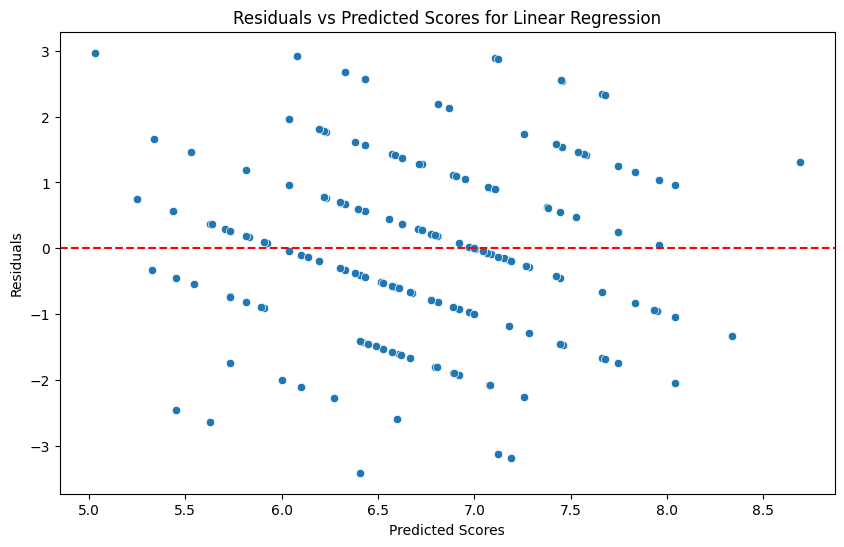

In [41]:
import numpy as np

residuals = y_test - lr_predictions

plt.figure(figsize=(10, 6))
sns.scatterplot(x=lr_predictions, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Scores')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Scores for Linear Regression')
plt.show()

### Visualization

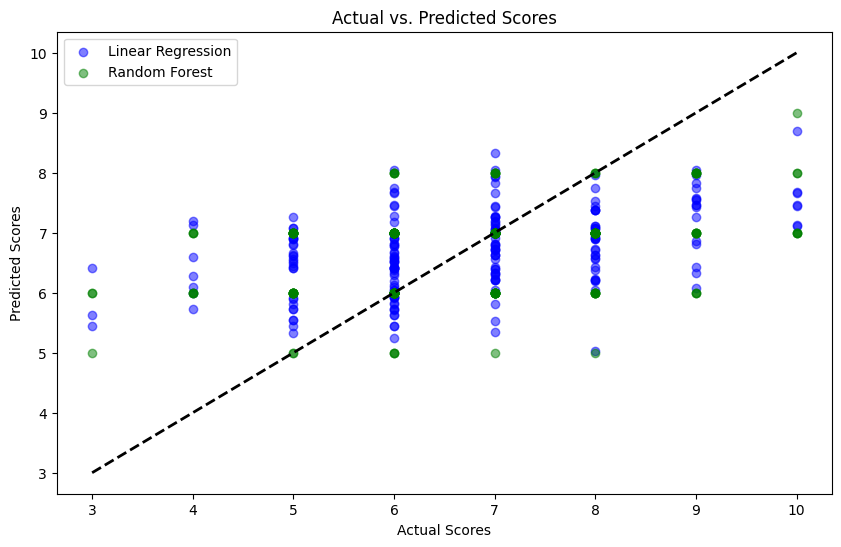

In [42]:
#Comparing Actual vs. Predicted Scores
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_predictions, color='blue', alpha=0.5, label='Linear Regression')
plt.scatter(y_test, rf_predictions, color='green', alpha=0.5, label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.title('Actual vs. Predicted Scores')
plt.legend()
plt.show()

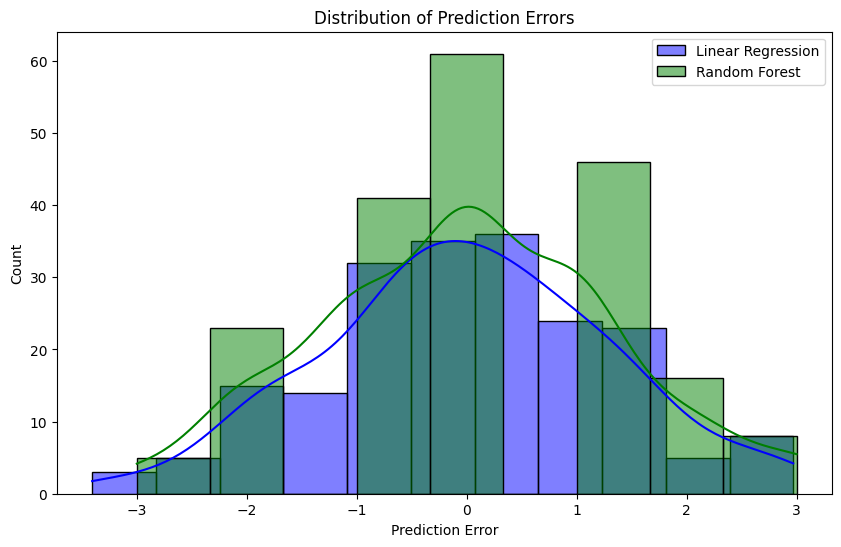

In [43]:
#Distribution of Errors

plt.figure(figsize=(10, 6))
sns.histplot(y_test - lr_predictions, kde=True, color='blue', label='Linear Regression', alpha=0.5)
sns.histplot(y_test - rf_predictions, kde=True, color='green', label='Random Forest', alpha=0.5)
plt.xlabel('Prediction Error')
plt.title('Distribution of Prediction Errors')
plt.legend()
plt.show()

## 7. Model Deployment
  Serialize the model using joblib.
  Develop a Flask API to serve the model predictions.
  Containerize the application with Docker.

In [44]:
import joblib

# Save the trained Linear Regression model
joblib.dump(lr_model, 'linear_regression_student_score_model.pkl')

['linear_regression_student_score_model.pkl']